# Computing Diefficiency Metrics with the dief R Package

# Installing the dief R Package from GitHub

In [ ]:
# If you have not installed the "devtools" package.
install.packages("devtools") 

In [ ]:
# Install the dief package from GitHub repository.
library("devtools")
devtools::install_github("maribelacosta/dief")

In [1]:
# Load the dief R package.
library("dief")

# Data Preparation

To compute the diefficiency metrics <b><i>dief@t</i></b> and <b><i>dief@k</i></b>, we need the answer trace produced by the SPARQL query engines when executing queries. <br />

<b>Answer traces</b> record the exact point in time when an engine produces an answer when executing a query. 

For this tutorial, we executed SPARQL queries using three different configurations of the <a href="http://people.aifb.kit.edu/mac/nlde/">nLDE engine</a>: `Selective`,  `NotAdaptive`,  `Random`.<br\> 

The resulting answer trace for each query execution is stored in a CSV file available at <a href="https://ndownloader.figshare.com/files/8955184">FigShare</a> (137.06 MB). The structure of the CSV file is as follows:
<ul>
<li><b>`query`</b>: id of the query executed. Example: 'Q9.sparql'</li>
<li><b>`approach`</b>: name of the approach (or engine) used to execute the query. </li>
<li><b>`tuple`</b>: the value `i` indicates that this row corresponds to the ith answer produced by `approach` when executing `query`. </li>
<li><b>`time`</b>: elapsed time (in seconds) since `approach` started the execution of `query` until the answer `i` is produced. </li>
</ul>

Next, we download the answer trace file and read it in the variable `traces`.

In [2]:
# Download the answer trace file with the query traces from FigShare. 
# Store the downloaded file in '/tmp/traces.csv'.
traces_file <- "/tmp/traces.csv"
download.file("https://ndownloader.figshare.com/files/8955184", traces_file)
traces <- read.csv(traces_file)

In [3]:
# Inspect the trace file.
head(traces)

query,approach,tuple,time
Q11.sparql,Selective,1,8.670243
Q11.sparql,Selective,2,8.877625
Q11.sparql,Selective,3,8.878194
Q11.sparql,Selective,4,9.129733
Q11.sparql,Selective,5,9.132296
Q11.sparql,Selective,6,9.133606


In addition, in this tutorial we are going to compare the performance of the nLDE engine using the metrics <i>dief@t</i> and <i>dief@k</i> as well as <b>conventional metrics</b> used in the query processing literature, such as: <i>execution time</i>, <i>time for the first tuple</i>, and <i>number of answers produced</i>.  

For this tutorial, we measured the performance of the nLDE engine using conventional metrics. The results are available at another CSV file in <a href="https://ndownloader.figshare.com/files/8955187">FigShare</a> (2.86 KB). The structure of this CSV file is as follows: 
<ul>
<li><b>`query`</b>: id of the query executed. Example: 'Q9.sparql'</li>
<li><b>`approach`</b>: name of the approach (or engine) used to execute the query. </li>
<li><b>`tfft`</b>: time (in seconds) required by `approach` to produce the first tuple when executing `query`. </li>
<li><b>`totaltime`</b>: elapsed time (in seconds) since `approach` started the execution of `query` until the last answer  of `query` is produced. </li>
<li><b>`comp`</b>: number of answers produced by `approach` when executing `query`. </li>
</ul>

In [4]:
# Download the result of the other metrics (execution time, etc.) from FigShare.
# Store the downloaded file in '/tmp/metrics.csv'.
metrics_file <- "/tmp/metrics.csv"
download.file("https://ndownloader.figshare.com/files/8955187", metrics_file)
metrics <- read.csv(metrics_file)

In [5]:
# Inspect the metric file.
head(metrics)

query,approach,tfft,totaltime,comp
Q11.sparql,NotAdaptive,5.886026,300.02924,1287
Q12.sparql,NotAdaptive,13.681366,74.35181,4834
Q13.sparql,NotAdaptive,23.121218,300.01434,14371
Q14.sparql,NotAdaptive,162.549945,300.01342,3
Q15.sparql,NotAdaptive,6.423510,300.03944,3430
Q16.sparql,NotAdaptive,28.438493,300.32796,13940


# Visualizing Answer Traces of Continuos SPARQL Query Engines

To measure the diefficiency of approaches, the metrics <b><i>dief@t</i></b> and <b><i>dief@k</i></b> compute the area under the curve of <b>answer traces</b>. Answer traces record the points in time when an approach produces an answer. 

With the `dief` R package, it is possible to plot the answer trace of a SPARQL engine when executing a query using the `dief::plotAnswerTrace` function.

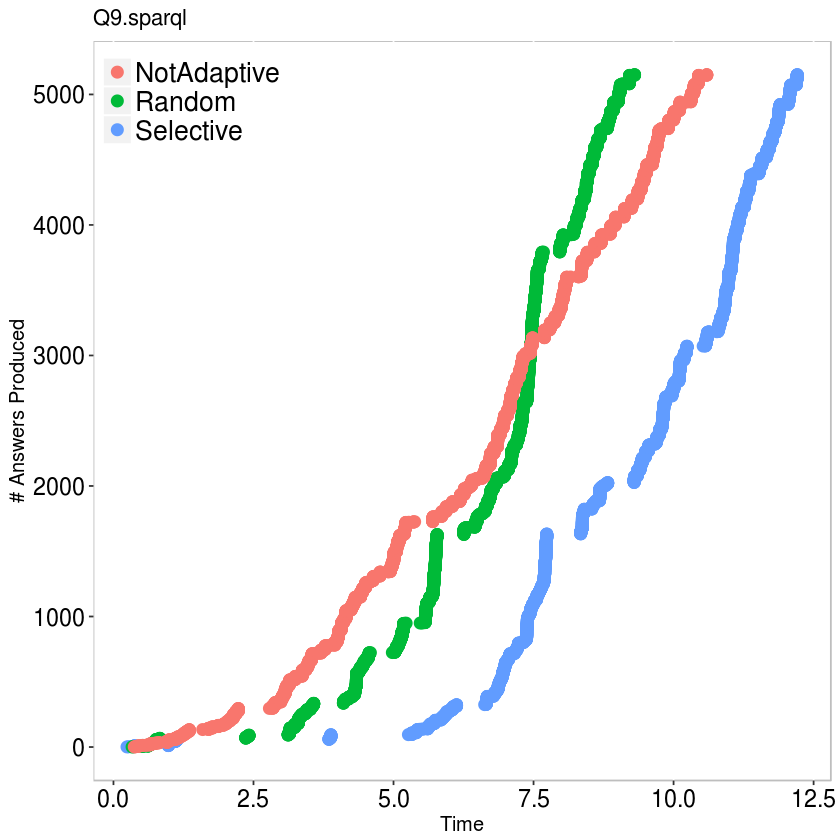

In [6]:
# Plot the answer trace recorded in `traces` for query `Q9.sparql`
plotAnswerTrace(traces, "Q9.sparql")

<b>Conclusion</b>: For `Q9.sparql`, we obseve that the answer trace of nLDE `Not Adaptive` (red line) surpasses the answer traces of the other approaches. This indicates that nLDE `Not Adaptive` continuously produces more answers than the other approaches.  

# Measuring Performance with dief@t

The metric <b><i>dief@t</i></b> measures the diefficiency of an engine in the first <i>t</i> time units of query execution. Intuitively, approaches that produce answers at a higher rate in a certain period of time are more efficient. <b><i>dief@t interpretation: Higher is better.</i></b>

The `dieft` function computes the <b><i>dief@t</i></b> metric as follows. 

In [7]:
# Compute dief@t of the approches recorded in `traces` when executing `Q9.sparql' 
# until the time unit 16 (in seconds).
dieft(traces, "Q9.sparql", 16)

query,approach,dieft
Q9.sparql,Selective,34111.30
Q9.sparql,Random,47487.04
Q9.sparql,NotAdaptive,48086.27


In [8]:
# Compute dief@t of the approches recorded in `traces` when executing `Q9.sparql' 
# until the  time unit when the fastest approach finalizes its execution.
dieft(traces, "Q9.sparql")

query,approach,dieft
Q9.sparql,Selective,4360.659
Q9.sparql,Random,12992.975
Q9.sparql,NotAdaptive,14104.411


## Reproducing Experiment 1: Comparing dief@t with Other Metrics

In this experiment, we compare the performance of the three variants of nLDE using conventional metrics from the query processing literature and <b><i>dief@t</i></b>. 

The function `experiment1` computes all the results reported in Experiment 1 at [1].

[1] Maribel Acosta, Maria-Esther Vidal, York Sure-Vetter. Diefficiency Metrics: Measuring the Continuous Efficiency of Query Processing Approaches. In Proceedings of the International Semantic Web Conference, 2017.

In [9]:
# Reproduce Experiment 1 using the files `traces_file` and `metrics_file`.
exp1 <- experiment1(traces_file, metrics_file)

[1] "Computing dieft for all approaches for query "
[2] "Q11.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q12.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q13.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q14.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q15.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q16.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q17.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q18.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q19.sparql"                                   
[1] "Computing dieft for all approaches for query "
[2] "Q1.spar

In [10]:
# Inspect the results for query `Q9.sparql`. 
# `throughput` is computed as comp/totaltime.
# `invtfft` is computed as 1/tfft.
# `invtotaltime` is computed as 1/totaltime.
subset(exp1, query=="Q9.sparql")

,query,approach,tfft,totaltime,comp,throughput,invtfft,invtotaltime,dieft
53,Q9.sparql,NotAdaptive,0.3710840,10.592792,5151,486.2741,2.694808,0.09440382,14104.411
54,Q9.sparql,Random,0.3326499,9.303557,5151,553.6592,3.006163,0.10748577,12992.975
55,Q9.sparql,Selective,0.2416301,12.209977,5151,421.8681,4.138558,0.08190024,4360.659


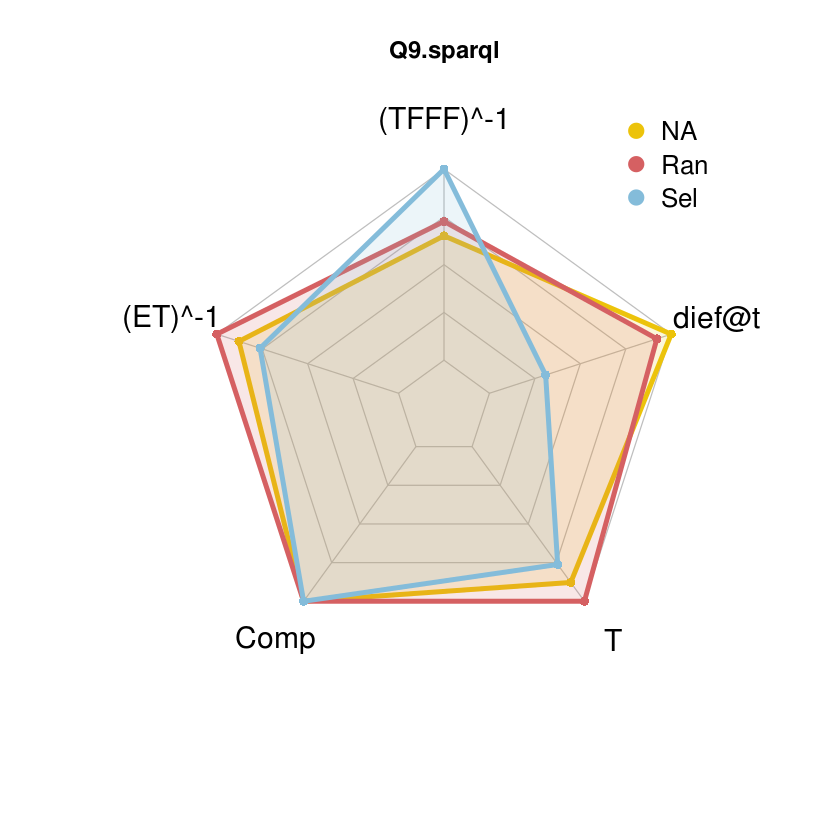

In [11]:
# Plot radar chart to compare the performance of the approaches with dief@t and other metrics.
# Plot interpreation: Higher is better. 
plotExperiment1Query(exp1, "Q9.sparql")

In [ ]:
# To plot the results of Experiment 1 for all the queries in the benchmark 
# use the following function.
plotExperiment1(exp1)

<b>Conclusion</b>: For `Q9.sparql`, the values of the metrics from the literature indicate that the three nLDE variants are competitive approaches. Yet, <i>dief@t</i> allows for uncovering that nLDE `Not Adaptive` is able to continuously produce answers at a faster rate than the other approaches for this query until the fastest approach finalizes its execution. 

# Measuring Performance with dief@k

The metric <b><i>dief@k</i></b> measures the diefficiency of an engine while producing the first <i>k</i> answers when executing a query.  Intuitively, approaches that require a shorter period of time to produced a certain number of answers are more efficient. <b><i>dief@k interpretation: Lower is better.</i></b>

The `diefk` and `diefk2` functions compute the <b><i>dief@k</i></b> metric as follows. 

In [12]:
# Compute dief@k of the approches recorded in `traces` when executing `Q9.sparql' 
# and producing the first 2,000 answers.
diefk(traces, "Q9.sparql", 2000)

query,approach,diefk
Q9.sparql,Selective,3235.551
Q9.sparql,Random,3517.679
Q9.sparql,NotAdaptive,4686.111


In [13]:
# Compute dief@k of the approches recorded in `traces` when executing `Q9.sparql' 
# and producing the first k answers, where k is the minimum of the total of answers 
# produced among all the approaches.
diefk(traces, "Q9.sparql")

query,approach,diefk
Q9.sparql,Selective,14588.18
Q9.sparql,Random,12992.97
Q9.sparql,NotAdaptive,20232.39


In [14]:
# Compute dief@k of the approches recorded in `traces` when executing `Q9.sparql' 
# and producing 50% of the answers. 
diefk2(traces, "Q9.sparql", 0.50)

query,approach,diefk
Q9.sparql,Selective,5537.021
Q9.sparql,Random,4636.632
Q9.sparql,NotAdaptive,6162.528


## Reproducing Experiment 2: Measuring dief@t at Different Answer Completeness

In this experiment, we compare the performance of the three variants of nLDE when producing different answer completeness percentages (25%, 50%, 75%, 100%) using  <b></i>dief@k</i></b>. 

The function `experiment2` computes all the results reported in Experiment 2 at [1].

[1] Maribel Acosta, Maria-Esther Vidal, York Sure-Vetter. Diefficiency Metrics: Measuring the Continuous Efficiency of Query Processing Approaches. In Proceedings of the International Semantic Web Conference, 2017.

In [15]:
# Reproduce Experiment 2 using the file `traces_file`.
exp2 <- experiment2(traces_file)

[1] "Computing diefk for all approaches for query "
[2] "Q11.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q12.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q13.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q14.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q15.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q16.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q17.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q18.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q19.sparql"                                   
[1] "Computing diefk for all approaches for query "
[2] "Q1.spar

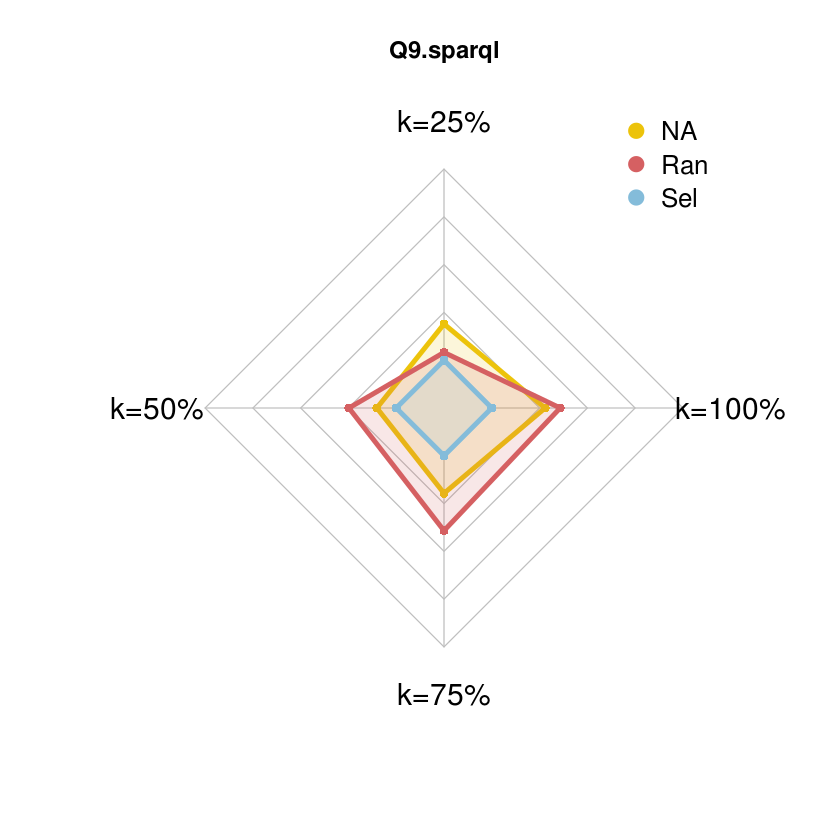

In [16]:
# Plot radar chart to compare the performance of the approaches with dief@k 
# at different answer completeness percentages (25%, 50%, 75%, 100%). 
# Plot interpreation: Lower is better. 
plotExperiment2Query(exp2, "Q9.sparql")

In [ ]:
# To plot the results of Experiment 2 for all the queries in the benchmark 
# use the following function.
plotExperiment2(exp2)

<b>Conclusion</b>: For `Q9.sparql`, the variants nLDE `Random` and `Selective` exhibit similar values of <i>dief@k</i> while producing the first 25% of the answers. However, when looking at <i>dief@k</i> at 100%, we can conclude that once nLDE `Selective` starts producing answers, it produces all the answers at a faster rate. This can be observed in the answer trace plot, where the trace for nLDE `Selective` (blue line) has a higher slope over time than the other approaches. 